# Imports

In [25]:
import museval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
accuracy = [1.0]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_initial = []

for n in names:
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_drop/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs_initial.append(results.agg_frames_tracks_scores()['drums']['SDR'])

In [27]:
accuracy = [0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
names = [['conv-tasnet', 'epoch_200'], ['demucs', 'epoch_280'], ['htdemucs', 'epoch_280']]
length_s = "4s"

sdrs_list = []
accuracies_list = []
for idx, n in enumerate(names):
    sdrs = [sdrs_initial[idx]]
    
    for t in accuracy:
        
        df = pd.read_csv(f"D:/Github/phd-drum-sep/rebuttal_experiments/{n[0]}/results_{n[1]}_{t}_fpr/results.csv")
        results = museval.EvalStore(frames_agg='median', tracks_agg='median')
        results.df = df
        sdrs.append(results.agg_frames_tracks_scores()['drums']['SDR'])

    sdrs_list.append(sdrs)
    accuracies_list.append(accuracy)
accuracy = [0] + accuracy

fpr_accuracy_converted  = [100 * (1 - (1 / (1 + a))) for a in accuracy]

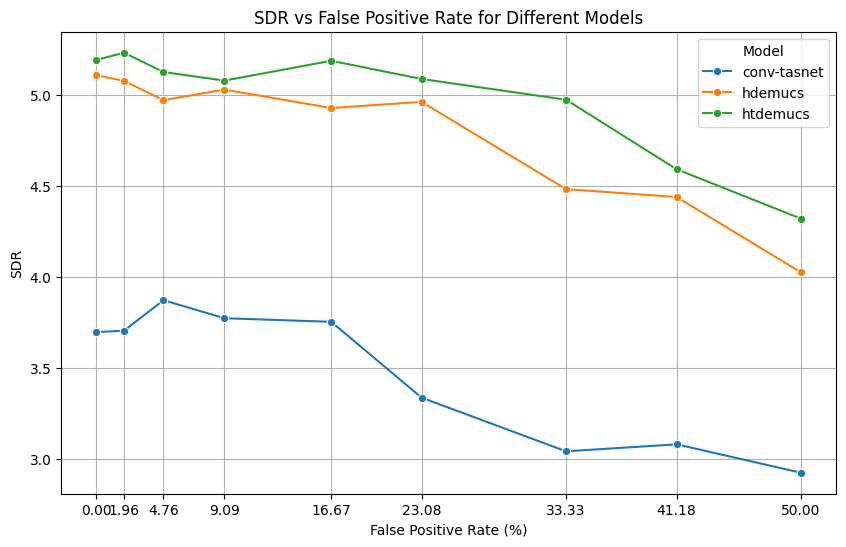

In [28]:
fpr_accuracy_converted  = [100 * (1 - (1 / (1 + a))) for a in accuracy]


# Creating a DataFrame for plotting
data_fpr = {
    'False Positive Rate (%)': fpr_accuracy_converted * len(names),
    'SDR': sdrs_list[0] + sdrs_list[1] + sdrs_list[2],
    'Model': ['conv-tasnet'] * len(fpr_accuracy_converted) + ['hdemucs'] * len(fpr_accuracy_converted) + ['htdemucs'] * len(fpr_accuracy_converted)
}
df_fpr = pd.DataFrame(data_fpr)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_fpr, x='False Positive Rate (%)', y='SDR', hue='Model', marker='o')

# Adding labels and title
plt.xlabel('False Positive Rate (%)')
plt.ylabel('SDR')
plt.title('SDR vs False Positive Rate for Different Models')
plt.grid(True)

# Customizing the grid
plt.xticks(fpr_accuracy_converted)
# plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Show plot
plt.show()